# Quantum spin Hall effect

In [1]:
import kwant

In [2]:
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
from ipywidgets import interact

In [5]:
sigma0 = np.array([[1, 0], [0, 1]])
sigmax = np.array([[0, 1], [1, 0]])
sigmay = np.array([[0, -1j], [1j, 0]])
sigmaz = np.array([[1, 0], [0, -1]])

We take parameters from C. Liu and S.-C. Zhang, in "Contemporary Concepts of Condensed Matter
Science", Topological Insulators, Vol. 6, edited by Marcel Franz and Laurens
Molenkamp (Elsevier, 2013) pp.59-89:


In [6]:
params = {
    "HgTe" : { "A": 3.65, "B": -68.6, "D": -51.1, "M": -0.01 },
    "InAs/GaSb" : { "A": 0.37, "B": -66.0, "D": -5.8, "M": -0.0075 }
}

In [7]:
xrange=range

In [22]:
def make_system(W, L, material="HgTe", a=1):
    """
    Parameters
    ----------
    W, L : width and length of the system in nm
    material: "HgTe" or "InAs/GaSb"
    a : lattice constant in nm
    """

    lat = kwant.lattice.square(a)

    mat = params[material]
    A, B, D, M = mat["A"], mat["B"], mat["D"], mat["M"]
    
    a_in_A = a * 10 # lattice constant in Angstrom
    
    A = A/2/a_in_A
    B = B/a_in_A**2
    D = D/a_in_A**2
    
    onsite = (M - 4 * B) * np.kron(sigma0, sigmaz) - 4 * D * np.kron(sigma0, sigma0) 
    hopx = B * np.kron(sigma0, sigmaz) + D * np.kron(sigma0, sigma0) + 1j * A * np.kron(sigmaz, sigmax)
    hopy = B * np.kron(sigma0, sigmaz) + D * np.kron(sigma0, sigma0) - 1j * A * np.kron(sigma0, sigmay)
    
    sys = kwant.Builder()
    for iy in xrange(int(W/a)):
        for ix in xrange(int(L/a)):
            sys[lat(ix, iy)] = onsite

    sys[kwant.HoppingKind((1, 0), lat)] = hopx
    sys[kwant.HoppingKind((0, 1), lat)] = hopy
    
    lead = kwant.Builder(kwant.TranslationalSymmetry([-a, 0]))
    for iy in xrange(int(W/a)):
        lead[lat(0, iy)] = onsite
    
    lead[kwant.HoppingKind((1, 0), lat)] = hopx
    lead[kwant.HoppingKind((0, 1), lat)] = hopy
    
    sys.attach_lead(lead)
    sys.attach_lead(lead.reversed())
    
    return sys.finalized()

### Plot the band structure

In [23]:
def plot_bs(W, material):
    print("width =", W, ", material =", material)
    
    sys = make_system(W=W, L=5, material=material)
    # note: I make only a short system here as I'm only interested in the lead
    kwant.plotter.bands(sys.leads[0], momenta=np.linspace(-0.3, 0.3, 100, endpoint=False), show=False)
    if material == "HgTe":
        plt.ylim(-0.05, 0.05)
    else:
        plt.ylim(-0.02, 0.02)

width = 100 , material = HgTe
CPU times: user 3.66 s, sys: 3.69 ms, total: 3.66 s
Wall time: 3.66 s


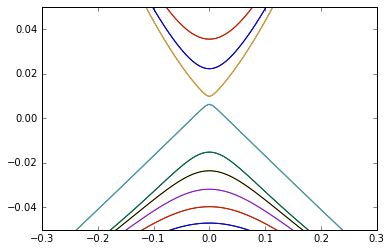

In [24]:
%%time
plot_bs(100, 'HgTe')

width = 300 , material = HgTe


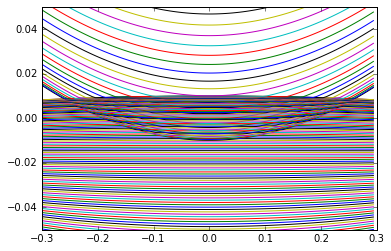

In [18]:
def plot_bs(W, material):
    print("width =", W, ", material =", material)
    
    sys = make_system(W=W, L=5, material=material)
    # note: I make only a short system here as I'm only interested in the lead
    kwant.plotter.bands(sys.leads[0], momenta=np.linspace(-0.3, 0.3, 100, endpoint=False), show=False)
    if material == "HgTe":
        plt.ylim(-0.05, 0.05)
    else:
        plt.ylim(-0.02, 0.02)
    
interact(plot_bs, W=(100, 500, 100), material=("HgTe", "InAs/GaSb"));

### Plot the local density of state (= sum over all scattering wave functions)

In [ ]:
def plot_wf(W, E, material):
    print("W =", W, ", energy =", E, ", material =", material)
    sys = make_system(W=W, L=200, material=material)
    ldos = kwant.ldos(sys, energy=E)
    # sum over the 4 components of the wave function
    ldos_sum = ldos[::4] + ldos[1::4] + ldos[2::4] + ldos[3::4]
    kwant.plotter.map(sys, ldos_sum)

interact(plot_wf, W=(100, 200, 50), E=(-0.01, 0.01, 0.001), material=("HgTe", "InAs/GaSb"));

### Tasks

- Can you see differences between HgTe and InAs/GaSb? (The differences are a bit subtle)
- Make some disturbance of the system along the lines of what we did for the quantum Hall effect!
- Suggestion 1: Make a multi-terminal structure!
- Suggestion 2: Consider the effect of a magnetic field: You should see a cross-
over from quantum spin Hall to quantum Hall effect. 
  How does thatcrossover look like in the band structure? What can you see in the wave function?
  
  Note: I myself haven't done that latter part - so I don't even know how it looks like. Surprise me!
  